In [1]:

%pip install mtcnn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 as cv
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2023-06-19 16:18:23.167322: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 16:18:23.353214: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 16:18:23.354767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 16:18:24.505873: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


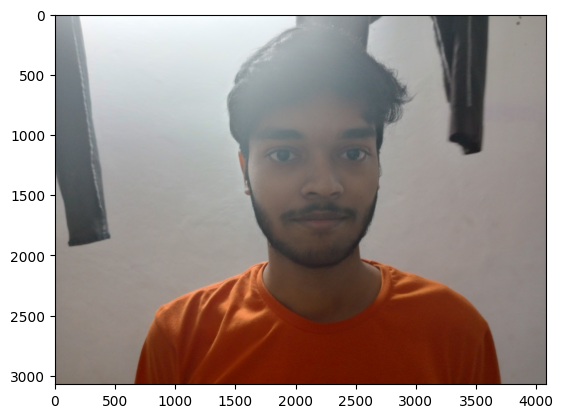

In [3]:
img = cv.imread(r"/home/deepjyotisarmah/Documents/Drone_stuffs/new_dataset/Aditya_Kumar/IMG_20230528_182235090_HDR.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

2023-06-19 16:18:34.294656: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-19 16:18:34.295691: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-19 16:18:34.966439: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54169344 exceeds 10% of free system memory.
2023-06-19 16:18:35.201127: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54169344 exceeds 10% of free sys

1/1 [==============================] - 0s 94ms/step


In [5]:
results

[{'box': [1585, 690, 1112, 1352],
  'confidence': 0.999883770942688,
  'keypoints': {'left_eye': (1936, 1151),
   'right_eye': (2466, 1134),
   'nose': (2221, 1458),
   'mouth_left': (1987, 1674),
   'mouth_right': (2433, 1673)}}]

In [6]:
x,y,w,h = results[0]['box']

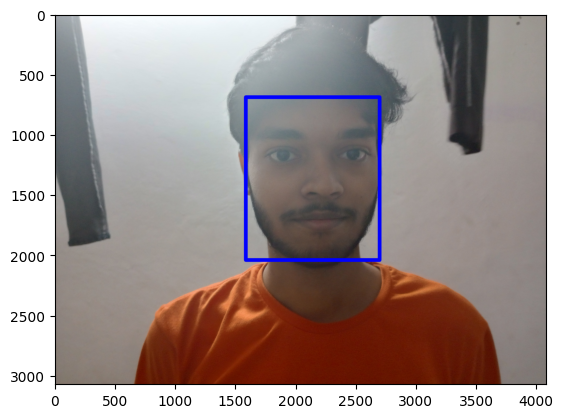

In [7]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

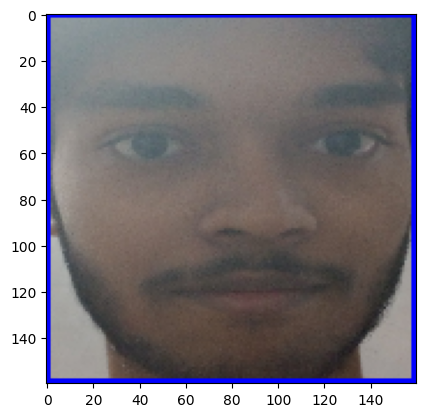

In [9]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160 
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [10]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [143, 152, 157],
        ...,
        [ 81,  92,  96],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [163, 156, 150],
        ...,
        [159, 149, 147],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

Automated Preprocessing:

In [11]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
    

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [12]:
faceloading = FACELOADING(r"/home/deepjyotisarmah/Documents/Drone_stuffs/new_dataset")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 26ms/step
Loaded successfully: 3
1/1 [==============================] - 0s 32ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 21ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 22ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 19ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 20ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 23ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 24ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 22ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 21ms/step
Loaded successfully: 4
1/1 [==============================] - 0s 21ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 19ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 6
1/1 [====================

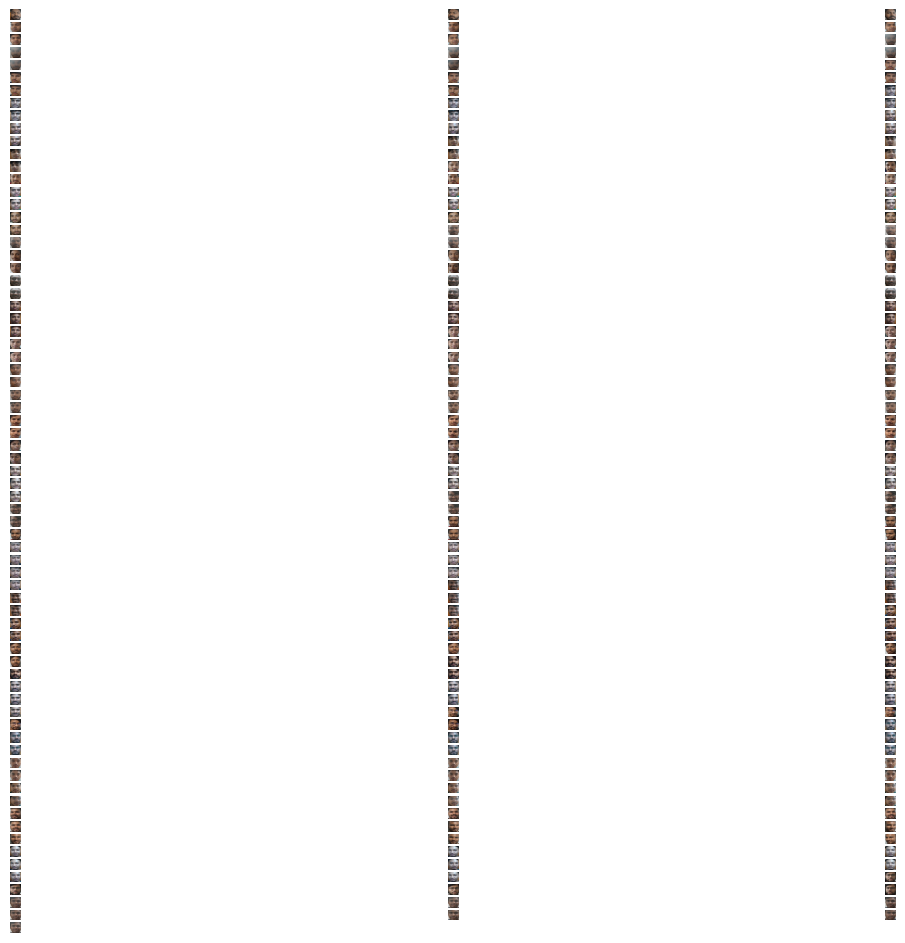

In [13]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

FACENET Part: 

In [14]:
%pip install keras-facenet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [16]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 47ms/step


In [17]:
np.savez_compressed('faces_embeddings_1.npz', EMBEDDED_X, Y)

SVM model:

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

Text(0, 0.5, '10')

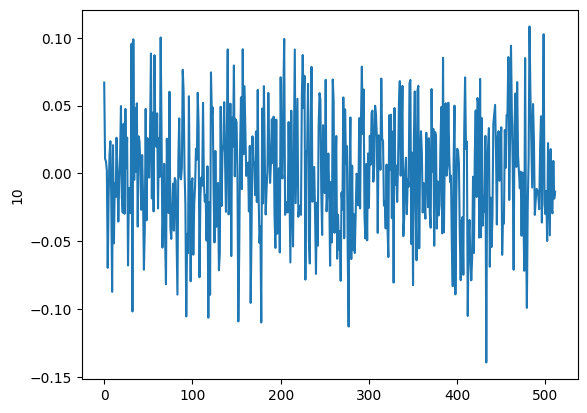

In [20]:
plt.plot(EMBEDDED_X[0]) 
plt.ylabel(Y[0])

In [21]:
Y

array([10, 10, 10, 15, 15, 15, 15, 15,  0,  0,  0,  0,  0,  0, 34, 34, 34,
       34, 34, 34, 27, 27, 27, 27, 27, 27, 24, 24, 24, 24, 24,  5,  5,  5,
        5,  5,  5, 20, 20, 20, 20, 20, 13, 13, 13, 13, 13, 13, 16, 16, 16,
       16, 35, 35, 35, 35, 35, 30, 30, 30, 30, 30, 30,  7,  7,  7,  7,  7,
        7, 33, 33, 33, 33, 33, 33, 33, 11, 11, 11, 11, 11, 11, 11, 11, 19,
       19, 19, 19, 19, 19, 21, 21, 21, 21, 21, 21, 32, 32, 32, 32, 32, 32,
       36, 36, 36, 36, 36, 36, 17, 17, 17, 17, 17, 17, 17, 29, 29, 29, 29,
       29, 29, 26, 26, 26, 26, 26,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        9,  9,  9,  9,  9,  9,  9,  1,  1,  1,  1,  1,  1,  1, 14, 14, 14,
       14,  8,  8,  8,  8,  8, 18, 18, 18, 18, 18, 18, 18,  2,  2,  2,  2,
       28, 28, 28, 28, 28, 28, 28,  3,  3,  3,  3,  3,  3, 12, 12, 12, 12,
       12, 12, 23, 23, 23, 23, 25, 25, 25, 25, 25,  6,  6,  6,  6,  6,  6,
        6,  6, 31, 31, 31, 31, 22, 22, 22, 22, 22, 22, 22])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [23]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [24]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [26]:
accuracy_score(Y_test,ypreds_test)

1.0

In [27]:
t_im = cv.imread(r"/home/deepjyotisarmah/Documents/Drone_stuffs/new_dataset/Ahgother_Mothilal/IMG_20230528_183643086.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

1/1 [==============================] - 0s 21ms/step


In [28]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 54ms/step


In [29]:
test_im = test_im.reshape(1,-1)
ypreds = model.predict(test_im)

In [33]:
print(ypreds)

[1]


In [34]:
encoder.inverse_transform(ypreds)

array([1])

In [48]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)